In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv("ML_DATASET.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


# --- Data Cleaning & Preprocessing ---

In [3]:
# Convert boolean-like columns to proper boolean
df['KPIs_met_more_than_80'] = df['KPIs_met_more_than_80'].astype(bool)
df['awards_won'] = df['awards_won'].astype(bool)

df = df.drop_duplicates(subset='employee_id', keep='first')
print("Data Shape after removing duplicates:", df.shape)

numeric_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['department', 'age', 'avg_training_score'])
print("Data Shape after dropping missing critical values:", df.shape)

df['department'] = df['department'].str.strip()
df['education'] = df['education'].str.strip()
df['gender'] = df['gender'].str.strip()
df['recruitment_channel'] = df['recruitment_channel'].str.strip()
df['region'] = df['region'].str.strip()

print("\nSummary Statistics:")
print(df.describe(include='all'))

Data Shape after removing duplicates: (17414, 13)
Data Shape after dropping missing critical values: (17414, 13)

Summary Statistics:
         employee_id         department    region  education gender  \
count   17414.000000              17414     17414      16643  17414   
unique           NaN                  9        34          3      2   
top              NaN  Sales & Marketing  region_2  Bachelors      m   
freq             NaN               5458      3918      11516  12312   
mean    39080.821408                NaN       NaN        NaN    NaN   
std     22707.879496                NaN       NaN        NaN    NaN   
min         3.000000                NaN       NaN        NaN    NaN   
25%     19280.250000                NaN       NaN        NaN    NaN   
50%     39114.000000                NaN       NaN        NaN    NaN   
75%     58837.500000                NaN       NaN        NaN    NaN   
max     78295.000000                NaN       NaN        NaN    NaN   

       recrui

# --- Visualizations ---

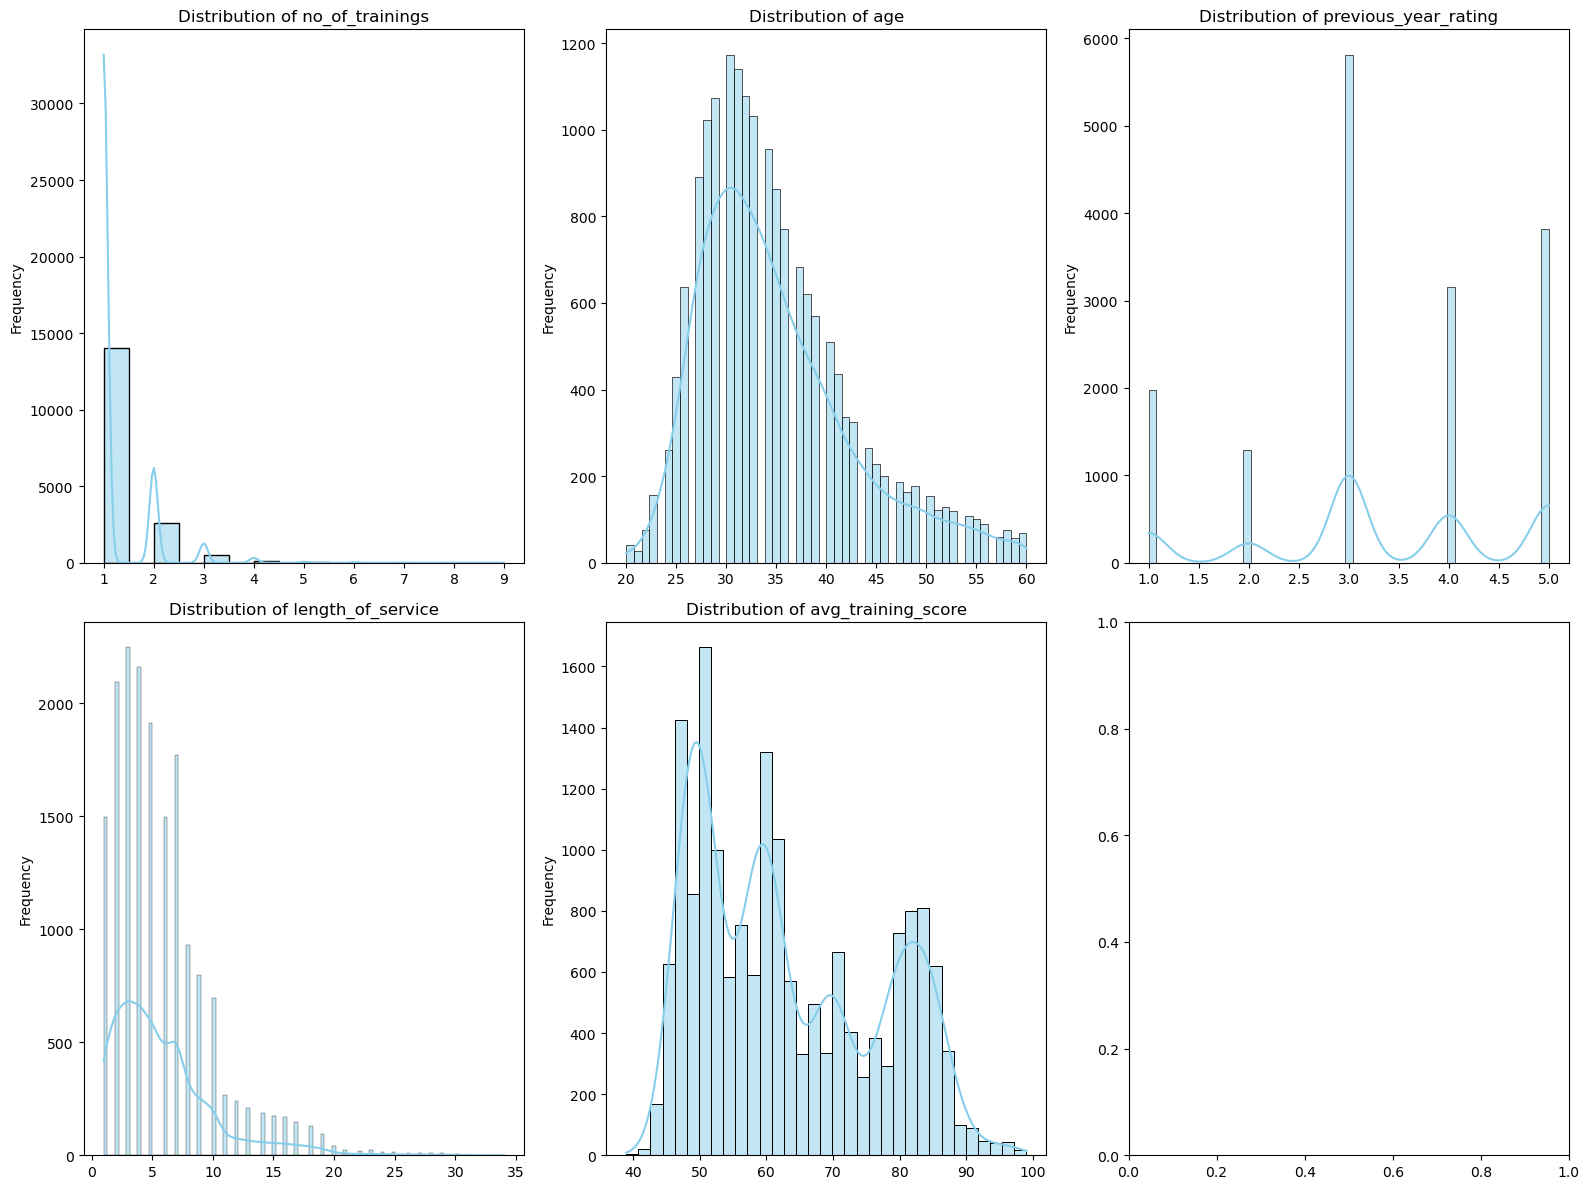

In [4]:
#1. Histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['employee_id'])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_features.columns):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

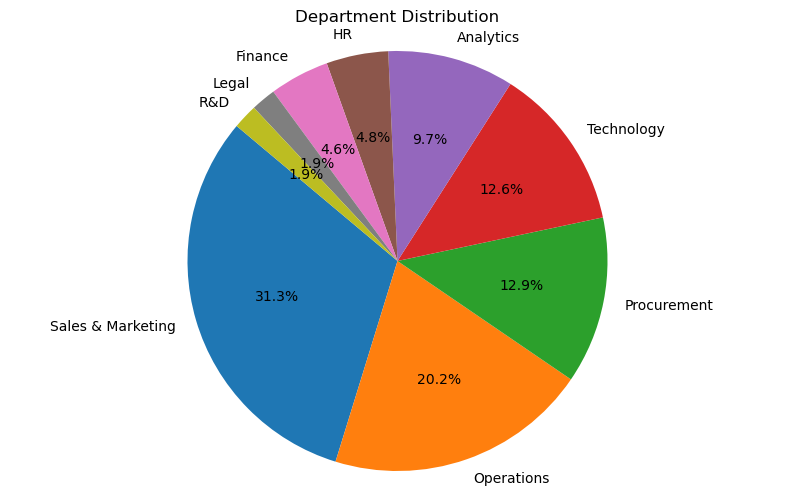

In [5]:
# 2. Department Distribution (Pie Chart)
plt.figure(figsize=(10, 6))
dept_counts = df['department'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Department Distribution')
plt.axis('equal')
plt.show()

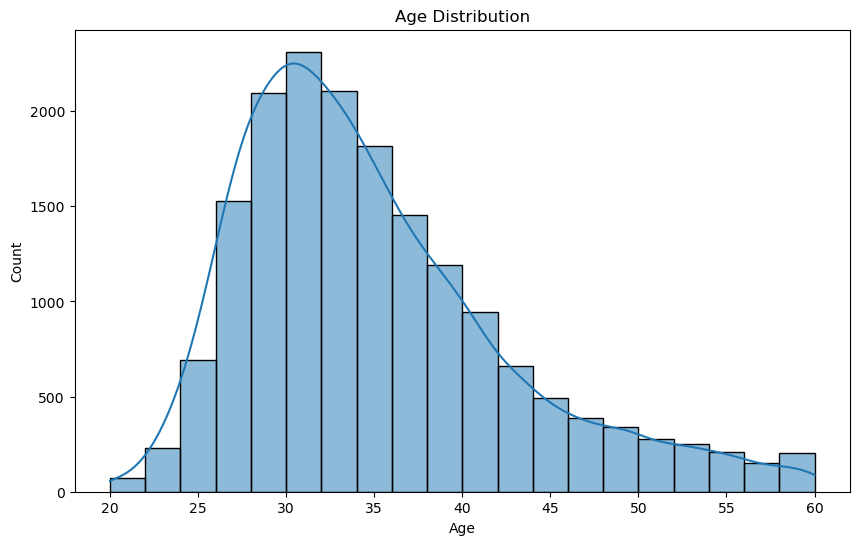

In [6]:
# 3. Age Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

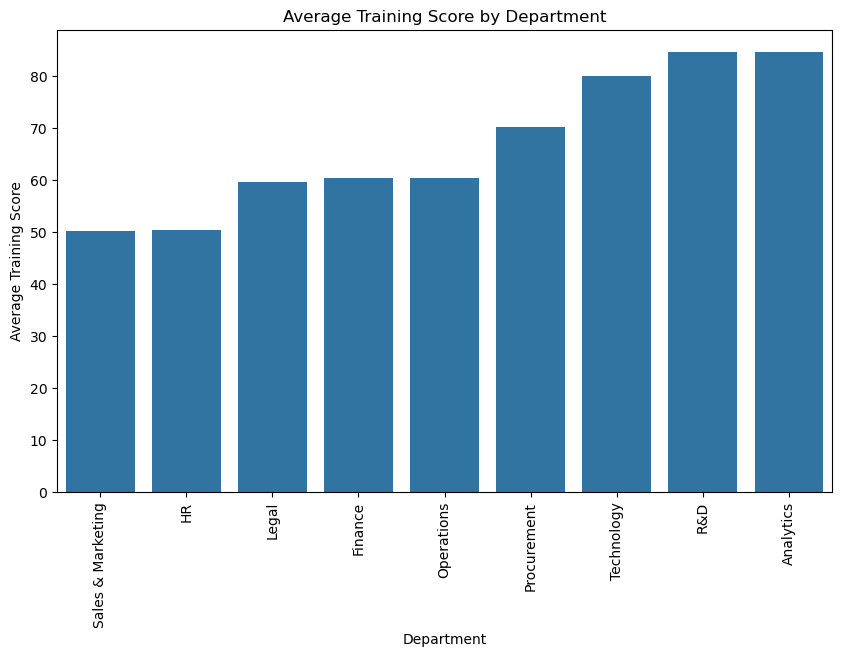

In [7]:
# 4. Average Training Score by Department (Bar Plot)
plt.figure(figsize=(10, 6))
avg_scores = df.groupby('department')['avg_training_score'].mean().sort_values()
sns.barplot(x=avg_scores.index, y=avg_scores.values)
plt.title('Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.xticks(rotation=90)
plt.show()

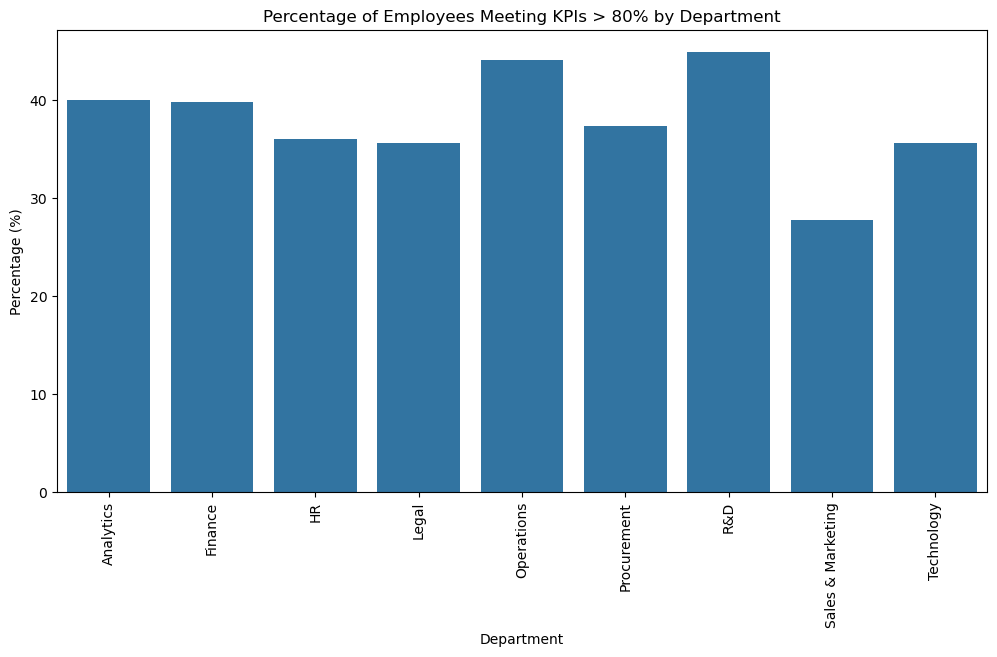

In [8]:
# 5. KPIs Met > 80% by Department (Bar Plot)
plt.figure(figsize=(12, 6))
kpi_met = df.groupby('department')['KPIs_met_more_than_80'].mean() * 100
sns.barplot(x=kpi_met.index, y=kpi_met.values)
plt.title('Percentage of Employees Meeting KPIs > 80% by Department')
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.show()

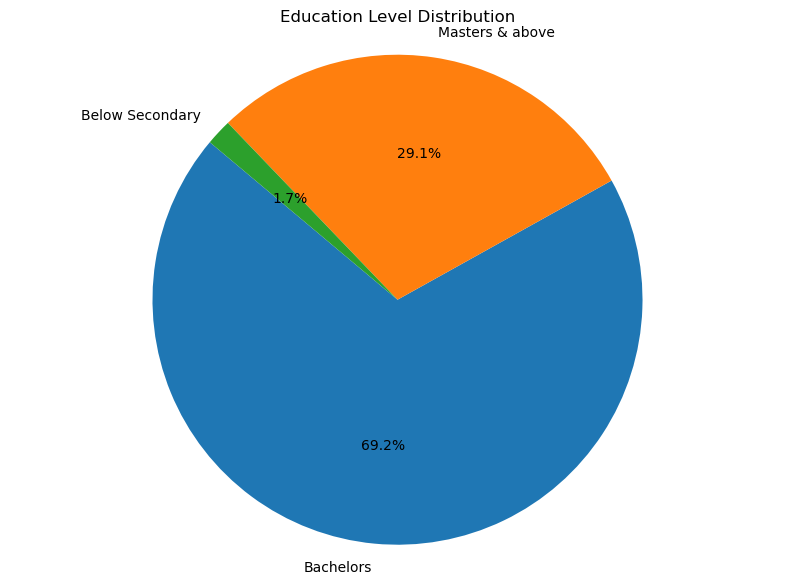

In [9]:
# 6. Education Level Distribution (Pie Chart)
plt.figure(figsize=(10, 7))
edu_counts = df['education'].value_counts()
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Level Distribution')
plt.axis('equal')
plt.show()

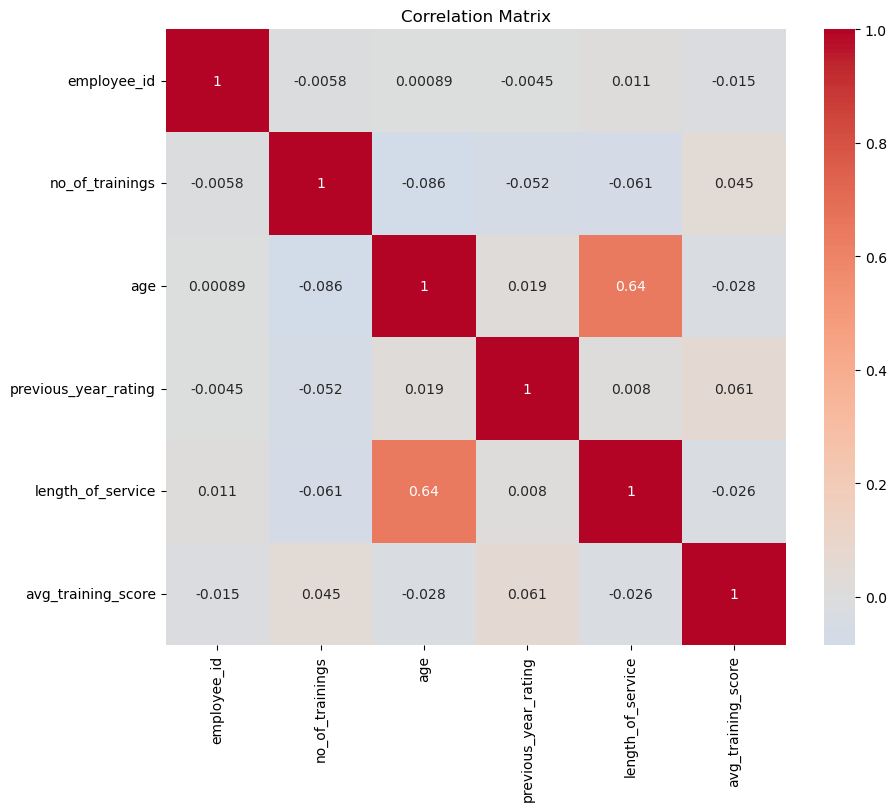

In [10]:
# 7. Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 8))
numeric_data = df.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()